In [56]:
import pandas as pd #Manejo de DataFrames
import numpy as np #Manejo de listas,diccionarios,arrays
import seaborn as sns # Gtaficos rapidos cuando tenempos BD
import matplotlib.pyplot as plt ##graficos (Personalidos de graficos)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_excel('BBDD_Hospitalización.xlsx')

C:\Users\MIGUEL GALLEGO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [4]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


Estos codigos los escribo primero que todo para conocer el tipo de varibles, como se ven las columnas , ir familiarizando con la base de datos. Esto me va ayudando a llegar a mi enfoque y realizar un buen analisis y limpieza de los datos.
ademas esta información proporciona una visión general de la distribución y la variabilidad de los datos en el DataFrame. Es útil para comprender rápidamente la naturaleza de los datos y detectar posibles valores atípicos.

In [5]:
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


Se observa que un paciente tiene edad maxima de 150 años esto seria un  valor atipico, lo cual es incorrecto. Este dato  podria entorpeser el estudio al afectar la precision y fiabilidad de los resultados. 
Para resolver este problema, es importante identificar y corregir los datos incorrectos. Debo revisar los registros y verficar si hay otros errores. Además, voy a establecer un limte de edad razonable  que yo considero para la edad que va hacer entre los 18 y 100 años.

In [6]:
df['EDAD'] = df['EDAD'].clip(18, 100)

In [7]:
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.716549,13.271401,12.996479,0.165493,0.014085
std,8.142185,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,100.000000,100.000000,24.000000,12.000000,3.000000


A continuacion voy a empezar a generar graficas, tablas sobre mi DataFrame, esto me puede ayudar a identificar relaciones entre variables, cuales son las mas importantes cuales no. De estas graficas o tablas voy a ir sacando conclusiones que me pueden ayudar.

In [8]:
tabla_frecuencia = df.groupby('HOSPITALIZACION').size().to_frame(name='Frecuencia').reset_index()
print(tabla_frecuencia.to_string())


  HOSPITALIZACION  Frecuencia
0              NO         541
1              SI          24


Predominio de pacientes no hospitalizados: La tabla muestra que la mayoría de los pacientes (541) no fueron hospitalizados por complicaciones infecciosas después de la biopsia prostática, mientras que solo 24 pacientes sí requirieron hospitalización.
Baja tasa de hospitalización: La tasa de hospitalización por complicaciones infecciosas después de la biopsia prostática es baja, con solo un 4,3% (24/565) de los pacientes que requirieron hospitalización.

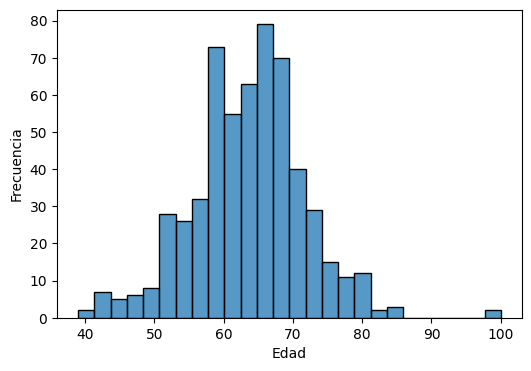

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="EDAD")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


La distribución de la edad parece ser asimétrica a la derecha, con una mayor cantidad de pacientes en el rango de 50 a 70 años.
La mediana de edad se encuentra alrededor de los 60 años.
Hay algunos pacientes que son extremadamente mayores (más de 80 años). Pero considere dejarlo.

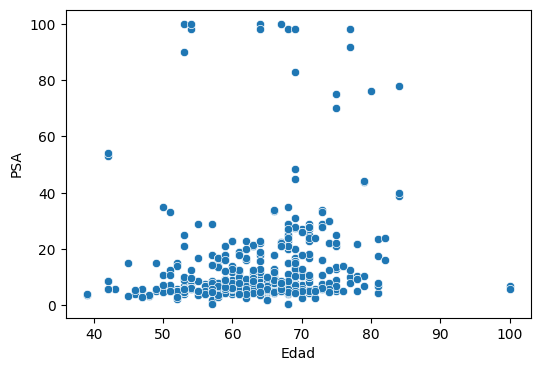

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="EDAD", y="PSA", data=df)
plt.xlabel('Edad')
plt.ylabel('PSA')
plt.show()


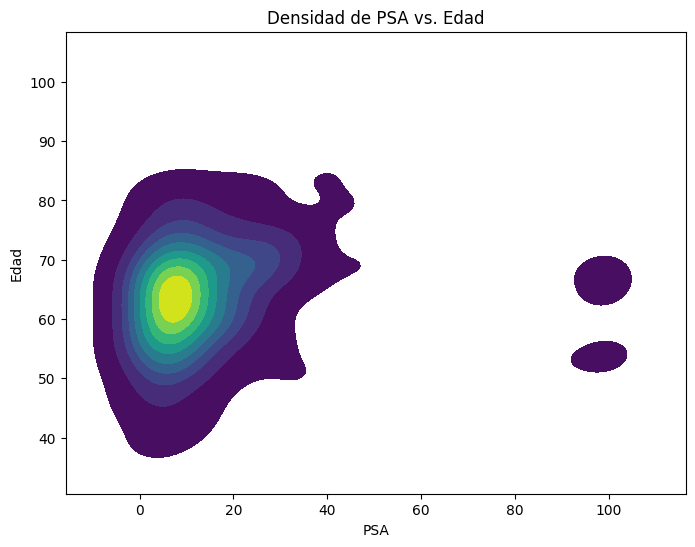

In [11]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='PSA', y='EDAD', cmap='viridis', fill=True)
plt.title('Densidad de PSA vs. Edad')
plt.xlabel('PSA')
plt.ylabel('Edad')
plt.show()

La densidad de PSA aumenta con la edad.
Hay una gran variabilidad en la densidad de PSA para cada edad.
Un hombre con un nivel elevado de PSA debe consultar a un médico.

In [12]:
contingency_table = pd.crosstab(df['HOSPITALIZACIÓN ULTIMO MES'], df['DIABETES'])
print(contingency_table)


DIABETES                     NO  SI
HOSPITALIZACIÓN ULTIMO MES         
NO                          501  62
SI                            4   1


De los pacientes que no fueron hospitalizados en el último mes, la mayoría no tiene diabetes (501 pacientes), mientras que 62 pacientes sí tienen diabetes.
Sin embargo, de los pacientes que sí fueron hospitalizados en el último mes, solo 1 paciente tiene diabetes, mientras que 4 pacientes no tienen diabetes.

Entre los pacientes hospitalizados en el último mes, la proporción de pacientes con diabetes es muy baja en comparación con los pacientes no hospitalizados.

Aunque la mayoría de los pacientes hospitalizados no tienen diabetes, la presencia de diabetes entre los hospitalizados podría ser relevante para analizar posibles relaciones o factores de riesgo asociados con la hospitalización.

In [13]:
fiebre_count = df['FIEBRE'].value_counts()
print(fiebre_count)


FIEBRE
NO    531
SI     37
Name: count, dtype: int64


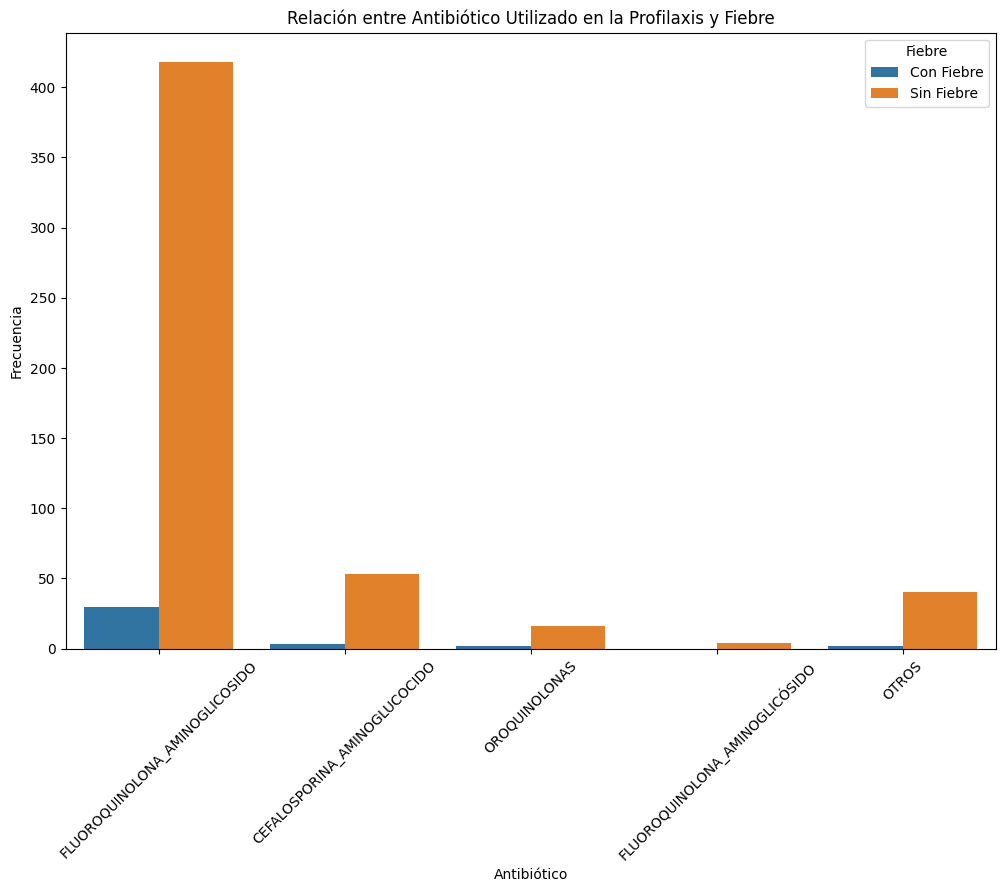

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', hue='FIEBRE')
plt.title('Relación entre Antibiótico Utilizado en la Profilaxis y Fiebre')
plt.xlabel('Antibiótico')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Fiebre', loc='upper right', labels=['Con Fiebre', 'Sin Fiebre'])
plt.show()



Después de revisar los datos y considerar la naturaleza de la variable ANTIBIOTICO UTILIZADO EN LA PROFILAXIS, se ha encontrado que la mayoría de los pacientes recibieron un tipo específico de antibiótico como parte de la profilaxis. Esto sugiere que la variable no es binaria, ya que todos los pacientes tienen un valor distinto de 0 en esta variable.

Por lo tanto, la mejor manera de representar esta información es utilizando variables dummy. Al convertir la variable categórica en variables dummy, se crea una columna separada para cada tipo de antibiótico utilizado, donde un paciente tendrá un valor de 1 en la columna correspondiente al antibiótico que recibió y 0 en las demás columnas. Esto permite al modelo capturar la información sobre los diferentes antibióticos utilizados y cómo afectan a la hospitalización de los pacientes.

In [15]:
cross_tab = pd.crosstab(index=df['AGENTE AISLADO'], columns=df['HOSPITALIZACION'])
print(cross_tab)


HOSPITALIZACION          NO  SI
AGENTE AISLADO                 
E.COLI                    0   6
NO                      524  16
PSEUDOMONAS AERUGINOSA    0   2


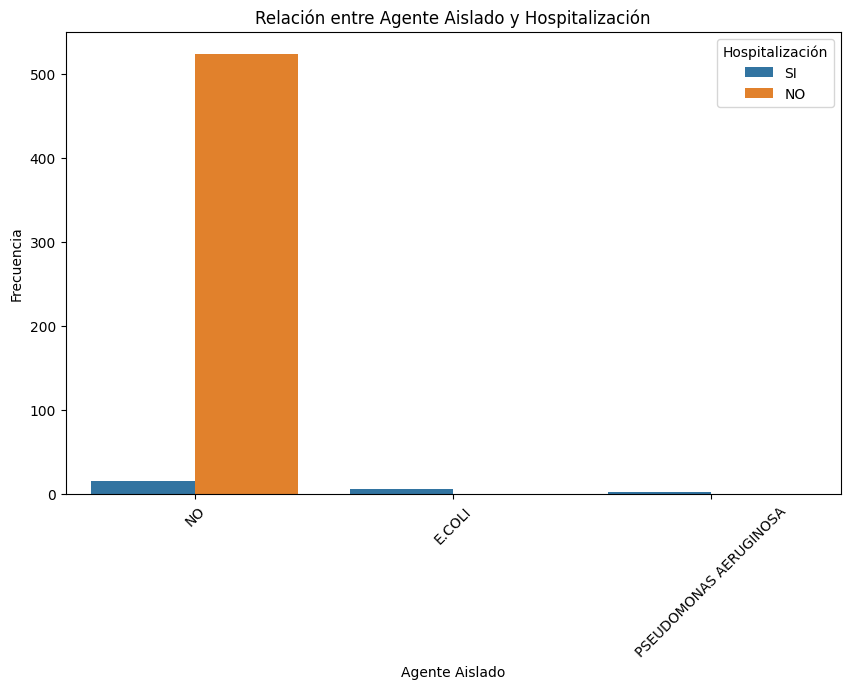

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AGENTE AISLADO', hue='HOSPITALIZACION')
plt.title('Relación entre Agente Aislado y Hospitalización')
plt.xlabel('Agente Aislado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Hospitalización', loc='upper right')
plt.show()


Al observar la relación entre el agente aislado y la hospitalización, se puede notar que todos los pacientes que presentaron un agente aislado específico, como E.COLI o PSEUDOMONAS AERUGINOSA, fueron hospitalizados. Esto sugiere que la presencia de ciertos agentes aislados puede estar asociada con un mayor riesgo de requerir hospitalización después de una biopsia de próstata.

Crear variables dummy para cada agente aislado nos permitirá incluir esta información en nuestro modelo de machine learning, lo que podría ayudar a identificar mejor a los pacientes con mayor riesgo de hospitalización y permitir una intervención más temprana o un seguimiento más cercano de estos pacientes.

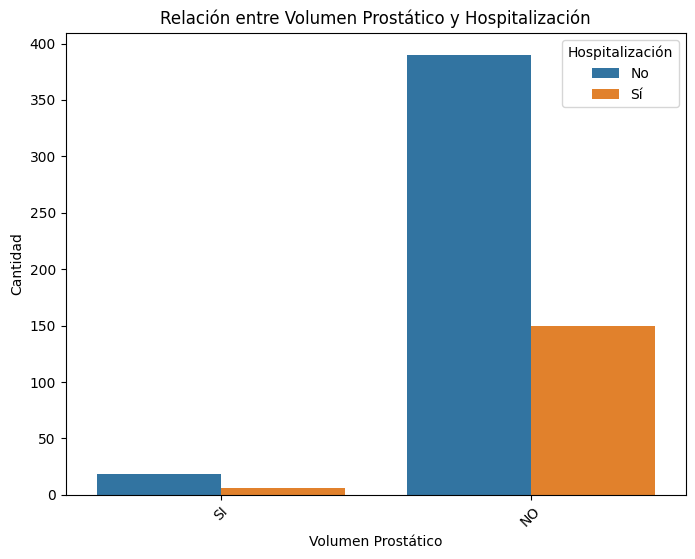

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='HOSPITALIZACION', hue='VOLUMEN PROSTATICO')
plt.title('Relación entre Volumen Prostático y Hospitalización')
plt.xlabel('Volumen Prostático')
plt.ylabel('Cantidad')
plt.legend(title='Hospitalización', loc='upper right', labels=['No', 'Sí'])
plt.xticks(rotation=45)
plt.show()



Se observa que una proporción significativa de pacientes no hospitalizados  no tienen gran volumen prostatico. lo que quiere decir que no depende la hospitalizacion de eso.

In [18]:
contingency_table = pd.crosstab(df['BIOPSIA'], df['HOSPITALIZACION'])
print(contingency_table)


HOSPITALIZACION                              NO  SI
BIOPSIA                                            
ADENOCARCINOMA GLEASON 10                     4   0
ADENOCARCINOMA GLEASON 6                     16   0
ADENOCARCINOMA GLEASON 6                     36   2
ADENOCARCINOMA GLEASON 7                     10   0
ADENOCARCINOMA GLEASON 7                    102   2
ADENOCARCINOMA GLEASON 8                     22   0
ADENOCARCINOMA GLEASON 9                     20   0
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS    2   0
HIPERPLASIA PROSTATICA                       14   0
NEG                                         301  20
PROSTATITIS                                  14   0


La mayoría de los pacientes con biopsias previas de tipo 'NEG' no fueron hospitalizados, lo que podría indicar que este tipo de resultado de biopsia no suele requerir hospitalización.
Algunos pacientes con biopsias de tipo 'ADENOCARCINOMA GLEASON 6' y 'ADENOCARCINOMA GLEASON 7' fueron hospitalizados, lo que podría indicar que estos tipos de biopsias pueden estar relacionados con un mayor riesgo de hospitalización.
Otros tipos de biopsias, como 'ADENOCARCINOMA GLEASON 8', 'ADENOCARCINOMA GLEASON 9' y 'PROSTATITIS', también muestran pacientes hospitalizados, pero en menor medida que los casos anteriores. la tabla muestra que ciertos tipos de resultados de biopsia pueden estar asociados con un mayor riesgo de hospitalización, mientras que otros tipos pueden tener menos probabilidades de requerir hospitalización. 


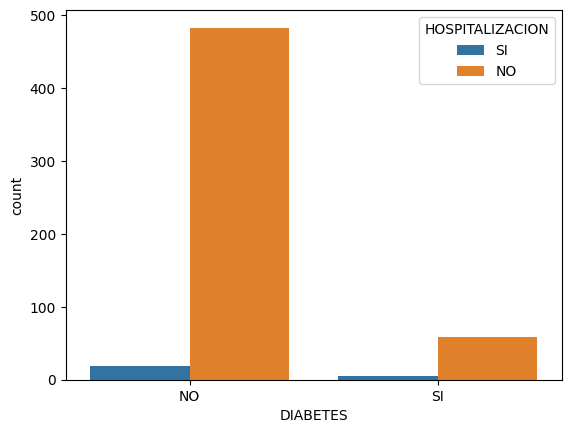

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para variables categóricas
sns.countplot(x='DIABETES', hue='HOSPITALIZACION', data=df)
plt.show()


A partir de los datos, se observa que la mayoría de los pacientes con diabetes no fueron hospitalizados después de la biopsia de próstata, mientras que un pequeño porcentaje de pacientes con diabetes sí requirieron hospitalización. Esto sugiere que la diabetes podría no ser un factor determinante para la hospitalización después de la biopsia de próstata, ya que la mayoría de los pacientes con diabetes no fueron hospitalizados. Sin embargo, es importante tener en cuenta que la diabetes sigue siendo una condición de riesgo y debe ser monitoreada cuidadosamente en pacientes sometidos a este procedimiento.

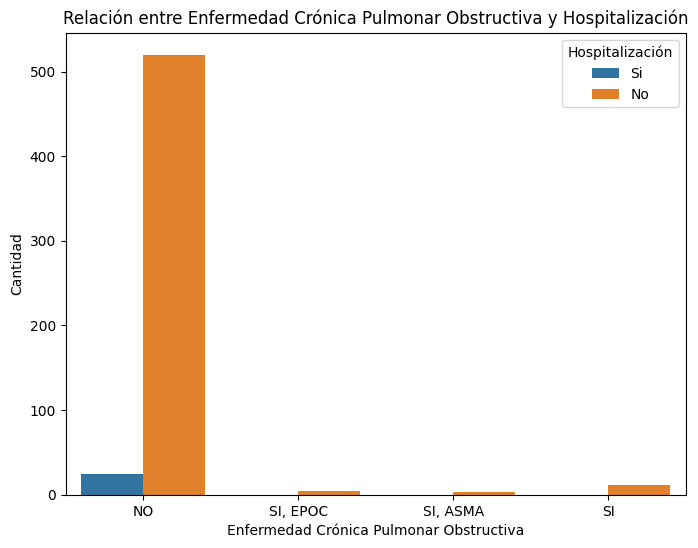

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ENF. CRONICA PULMONAR OBSTRUCTIVA', hue='HOSPITALIZACION', data=df)
plt.title('Relación entre Enfermedad Crónica Pulmonar Obstructiva y Hospitalización')
plt.xlabel('Enfermedad Crónica Pulmonar Obstructiva')
plt.ylabel('Cantidad')
plt.legend(title='Hospitalización', loc='upper right', labels=['Si', 'No'])
plt.show()


Basándonos en la comparación de hospitalización según la presencia de enfermedad crónica pulmonar obstructiva (EPOC), observamos que la mayoría de los pacientes sin EPOC no fueron hospitalizados (520 pacientes), mientras que solo un pequeño número de pacientes con EPOC fueron hospitalizados (4 pacientes). Esto sugiere que la presencia de EPOC podría estar asociada con un mayor riesgo de hospitalización después de una biopsia de próstata. Tambien voy a considerar llevar esta variable a dummy

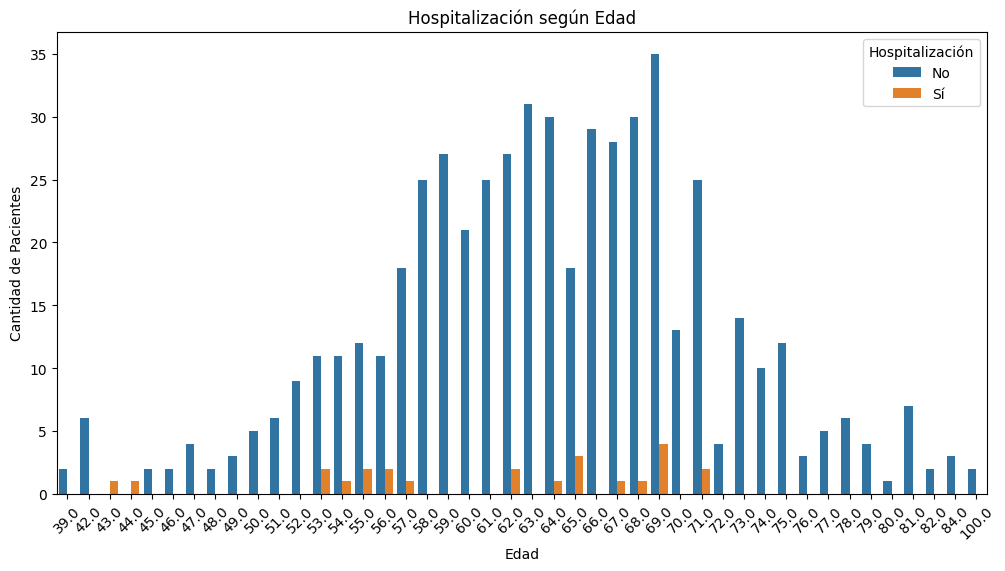

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='EDAD', hue='HOSPITALIZACION')
plt.title('Hospitalización según Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Pacientes')
plt.legend(title='Hospitalización', loc='upper right', labels=['No', 'Sí'])
plt.xticks(rotation=45)
plt.show()



El análisis de la edad en relación con la hospitalización después de una biopsia de próstata sugiere que la edad de los pacientes hospitalizados varía considerablemente y no muestra un patrón claro que indique una influencia significativa de la edad en la probabilidad de ser hospitalizado. Esto sugiere que otros factores pueden estar desempeñando un papel más importante en la decisión de hospitalización que la edad por sí sola.

Tras analizar las diferentes variables mediante tablas y gráficos, se identificó la necesidad de convertir las variables categóricas de 'SI' y 'NO' a binarias. Este proceso es crucial para mejorar la eficacia del modelo, ya que permite establecer una representación numérica clara y coherente, facilitando así el análisis y la interpretación de las variables. Además, esta transformación puede proporcionar una mayor claridad sobre las columnas que pueden eliminarse, lo que contribuye a la construcción de un modelo más efectivo y preciso.

Además, se puede observar un gran desbalance en los datos, lo que podría generar inconvenientes al desarrollar el modelo, especialmente en un Random Forest. El desbalance de clases puede llevar a que el modelo se sesgue hacia la clase mayoritaria, reduciendo la capacidad de generalización y precisión para las clases minoritarias. Para abordar este problema, se pueden utilizar técnicas como el muestreo de forma balanceada o ajustar los pesos de clase en el modelo Random Forest. Estas estrategias ayudarán a mejorar el rendimiento del modelo al tratar de igualar la importancia de todas las clases durante el entrenamiento.

In [22]:
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)


EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  

Se observa la presencia de varios valores nulos en todas las columnas del conjunto de datos. Dado que eliminar estos registros podría resultar en la pérdida de información importante para el análisis, se optará por imputar estos valores faltantes. En el caso de las variables categóricas, la imputación utilizando la moda es una opción adecuada, ya que este valor representa la categoría más frecuente en la muestra. La moda ayuda a preservar la distribución original de la variable y a minimizar la posibilidad de distorsiones en los resultados, siendo además menos sensible a valores extremos. Por otro lado, para las variables numéricas, se prefiere la mediana sobre la media para la imputación de valores faltantes. La mediana es una medida más robusta en presencia de valores atípicos, ya que no se ve afectada por estos extremos al seleccionar el valor central de la muestra ordenada. Una vez completada la imputación, se realizará la conversión de las variables pertinentes a valores binarios (1 y 0) para mejorar la capacidad predictiva del modelo durante su entrenamiento.
Ademas voy a realizar el cambio a variables dummys lasdos que mencione antes.

In [23]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


A continuacion empiezo con el cambio de variables y de tipo de datos, como ya lo mencione antes.

In [24]:
df['DIABETES'] = df['DIABETES'].replace({'SI': '1', 'NO': '0'},regex=True)

In [25]:
df['DIABETES'] = df['DIABETES'].fillna(df['DIABETES'].mode()[0])

In [26]:
df['DIABETES'] = df['DIABETES'].astype('int64')

In [27]:

df['HOSPITALIZACIÓN ULTIMO MES'] = df['HOSPITALIZACIÓN ULTIMO MES'].replace({'SI': '1', 'NO': '0'}, regex=True)
df['HOSPITALIZACIÓN ULTIMO MES'] = df['HOSPITALIZACIÓN ULTIMO MES'].fillna(df['HOSPITALIZACIÓN ULTIMO MES'].mode()[0])
df['HOSPITALIZACIÓN ULTIMO MES'] = df['HOSPITALIZACIÓN ULTIMO MES'].astype('int64')



In [28]:

df['BIOPSIAS PREVIAS'] = df['BIOPSIAS PREVIAS'].replace({'SI': '1', 'NO': '0'}, regex=True)
df['BIOPSIAS PREVIAS'] = df['BIOPSIAS PREVIAS'].fillna(df['BIOPSIAS PREVIAS'].mode()[0])
df['BIOPSIAS PREVIAS'] = df['BIOPSIAS PREVIAS'].astype('int64')

In [29]:

df['VOLUMEN PROSTATICO'] = df['VOLUMEN PROSTATICO'].replace({'SI': '1', 'NO': '0'}, regex=True)
df['VOLUMEN PROSTATICO'] = df['VOLUMEN PROSTATICO'].fillna(df['VOLUMEN PROSTATICO'].mode()[0])
df['VOLUMEN PROSTATICO'] = df['VOLUMEN PROSTATICO'].astype('int64')



In [30]:

df['CUP'] = df['CUP'].replace({'SI': '1', 'NO': '0'}, regex=True)
df['CUP'] = df['CUP'].fillna(df['CUP'].mode()[0])
df['CUP'] = df['CUP'].astype('int64')


In [31]:

df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna(df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].mode()[0])
df = pd.get_dummies(df, columns=['ENF. CRONICA PULMONAR OBSTRUCTIVA'], prefix='EPOC', drop_first=True)
dummy_cols = [col for col in df.columns if 'EPOC' in col]
for col in dummy_cols:
    df[col] = df[col].astype(int)

df.head()


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,BIOPSIA,...,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,EPOC_SI,"EPOC_SI, ASMA","EPOC_SI, EPOC"
0,53.0,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,NEG,...,NO,NO,NO,NO,SI,2.0,0.0,0,0,0
1,56.0,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,NEG,...,NO,NO,NO,NO,SI,5.0,0.0,0,0,0
2,57.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,NEG,...,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0,0,0,0
3,56.0,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,NEG,...,NO,NO,NO,NO,SI,5.0,0.0,0,0,0
4,55.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,NEG,...,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0,0,0,0


In [32]:

df['FIEBRE'] = df['FIEBRE'].replace({'SI': '1', 'NO': '0'}, regex=True)
df['FIEBRE'] = df['FIEBRE'].fillna(df['FIEBRE'].mode()[0])
df['FIEBRE'] = df['FIEBRE'].astype('int64')


In [33]:

df['HOSPITALIZACION'] = df['HOSPITALIZACION'].replace({'SI': '1', 'NO': '0'}, regex=True)
df['HOSPITALIZACION'] = df['HOSPITALIZACION'].fillna(df['HOSPITALIZACION'].mode()[0])
df['HOSPITALIZACION'] = df['HOSPITALIZACION'].astype('int64')


In [34]:

df['ITU'] = df['ITU'].replace({'SI': '1', 'NO': '0'}, regex=True)
df['ITU'] = df['ITU'].fillna(df['ITU'].mode()[0])
df['ITU'] = df['ITU'].astype('int64')


In [35]:


df['AGENTE AISLADO'] = df['AGENTE AISLADO'].fillna(0)
df = pd.get_dummies(df, columns=['AGENTE AISLADO'], prefix='AGENTE', drop_first=True)
dummy_cols = [col for col in df.columns if 'AGENTE' in col]
for col in dummy_cols:
    df[col] = df[col].astype(int)

df.head()



,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,BIOPSIA,...,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,EPOC_SI,"EPOC_SI, ASMA","EPOC_SI, EPOC",AGENTE_E.COLI,AGENTE_NO,AGENTE_PSEUDOMONAS AERUGINOSA
0,53.0,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,NEG,...,NO,1,2.0,0.0,0,0,0,0,1,0
1,56.0,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,NEG,...,NO,1,5.0,0.0,0,0,0,0,1,0
2,57.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,NEG,...,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4.0,3.0,0,0,0,1,0,0
3,56.0,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,0,NEG,...,NO,1,5.0,0.0,0,0,0,0,1,0
4,55.0,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,0,NEG,...,NO,1,4.0,3.0,0,0,0,1,0,0


In [36]:
df['EDAD'] = df['EDAD'].fillna(df['EDAD'].median()).astype(int)
df['EDAD'] = df['EDAD'].fillna(df['EDAD'].mode()[0]).astype('int64')

In [37]:
df['PSA'] = df['PSA'].fillna(df['PSA'].median()).astype(int)
df['PSA'] = df['PSA'].fillna(df['PSA'].mode()[0]).astype('float64')

In [38]:
df['NUMERO DE MUESTRAS TOMADAS'] = df['NUMERO DE MUESTRAS TOMADAS'].fillna(df['NUMERO DE MUESTRAS TOMADAS'].median()).astype(int)
df['NUMERO DE MUESTRAS TOMADAS '] = df['NUMERO DE MUESTRAS TOMADAS'].fillna(df['NUMERO DE MUESTRAS TOMADAS'].mode()[0]).astype('int64')

In [39]:

df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].fillna(df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].mode()[0])
df = pd.get_dummies(df, columns=['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'], prefix='ANTIBIOTICO', drop_first=True)
dummy_cols = [col for col in df.columns if 'ANTIBIOTICO' in col]
for col in dummy_cols:
    df[col] = df[col].astype(int)

df.head()




,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,...,"EPOC_SI, ASMA","EPOC_SI, EPOC",AGENTE_E.COLI,AGENTE_NO,AGENTE_PSEUDOMONAS AERUGINOSA,NUMERO DE MUESTRAS TOMADAS,ANTIBIOTICO_FLUOROQUINOLONA_AMINOGLICOSIDO,ANTIBIOTICO_FLUOROQUINOLONA_AMINOGLICÓSIDO,ANTIBIOTICO_OROQUINOLONAS,ANTIBIOTICO_OTROS
0,53,0,0,4.0,0,1,12,0,NEG,1,...,0,0,0,1,0,12,1,0,0,0
1,56,0,0,7.0,0,1,12,0,NEG,1,...,0,0,0,1,0,12,1,0,0,0
2,57,0,0,29.0,1,1,24,0,NEG,1,...,0,0,1,0,0,24,1,0,0,0
3,56,0,0,7.0,0,1,12,0,NEG,1,...,0,0,0,1,0,12,1,0,0,0
4,55,0,0,29.0,1,1,24,0,NEG,1,...,0,0,1,0,0,24,1,0,0,0


In [40]:
df['DIAS HOSPITALIZACIÓN UPC'] = df['DIAS HOSPITALIZACIÓN UPC'].fillna(df['DIAS HOSPITALIZACIÓN UPC'].median()).astype(int)
df['DIAS HOSPITALIZACIÓN UPC'].fillna(df['DIAS HOSPITALIZACIÓN UPC'].mode()[0]).astype('int64')

0      0
1      0
2      3
3      0
4      3
      ..
565    0
566    0
567    0
568    0
569    0
Name: DIAS HOSPITALIZACIÓN UPC, Length: 570, dtype: int64

In [41]:
df['DIAS HOSPITALIZACION MQ'] = df['DIAS HOSPITALIZACION MQ'].fillna(df['DIAS HOSPITALIZACION MQ'].median()).astype(int)
df['DIAS HOSPITALIZACION MQ'].fillna(df['DIAS HOSPITALIZACION MQ'].mode()[0]).astype('int64')

0      2
1      5
2      4
3      5
4      4
      ..
565    0
566    0
567    0
568    0
569    0
Name: DIAS HOSPITALIZACION MQ, Length: 570, dtype: int64

In [42]:

df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace({'NO': '0', '1': '1', '2': '1', '3': '1', '4': '1', '5': '1', '6': '1', '7': '1', '8': '1', '9': '1'}, regex=True)
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].fillna(df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].mode()[0])
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].astype('int64')


In [43]:

df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace({'NO': '0'}, regex=True)
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].apply(lambda x: '1' if x != '0' else x)
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].astype('int64')
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].fillna(df['PATRON DE RESISTENCIA'].mode()[0])


In [44]:

df['TIPO DE CULTIVO'] = df['TIPO DE CULTIVO'].replace({'NO': '0'}, regex=True)
df['TIPO DE CULTIVO'] = df['TIPO DE CULTIVO'].apply(lambda x: '1' if x != '0' else x)
df['TIPO DE CULTIVO'] = df['TIPO DE CULTIVO'].fillna(df['TIPO DE CULTIVO'].mode()[0])
df['TIPO DE CULTIVO'] = df['TIPO DE CULTIVO'].astype('int64')


In [46]:
df['BIOPSIA'] = df['BIOPSIA'].replace({'NEG': '0'})
df['BIOPSIA'] = df['BIOPSIA'].apply(lambda x: '1' if x != '0' else x)
df['BIOPSIA'] = df['BIOPSIA'].fillna(df['BIOPSIA'].mode()[0])
df['BIOPSIA'] = df['BIOPSIA'].astype('int64')


In [47]:
df.head(150)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,...,"EPOC_SI, ASMA","EPOC_SI, EPOC",AGENTE_E.COLI,AGENTE_NO,AGENTE_PSEUDOMONAS AERUGINOSA,NUMERO DE MUESTRAS TOMADAS,ANTIBIOTICO_FLUOROQUINOLONA_AMINOGLICOSIDO,ANTIBIOTICO_FLUOROQUINOLONA_AMINOGLICÓSIDO,ANTIBIOTICO_OROQUINOLONAS,ANTIBIOTICO_OTROS
0,53,0,0,4.0,0,1,12,0,0,1,...,0,0,0,1,0,12,1,0,0,0
1,56,0,0,7.0,0,1,12,0,0,1,...,0,0,0,1,0,12,1,0,0,0
2,57,0,0,29.0,1,1,24,0,0,1,...,0,0,1,0,0,24,1,0,0,0
3,56,0,0,7.0,0,1,12,0,0,1,...,0,0,0,1,0,12,1,0,0,0
4,55,0,0,29.0,1,1,24,0,0,1,...,0,0,1,0,0,24,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,61,0,0,4.0,0,1,12,0,0,0,...,0,0,0,1,0,12,1,0,0,0
146,58,0,0,17.0,0,0,12,0,0,0,...,0,0,0,0,0,12,1,0,0,0
147,65,1,0,2.0,0,1,12,0,0,0,...,0,0,0,1,0,12,1,0,0,0
148,59,0,0,9.0,0,0,10,0,0,0,...,0,0,0,1,0,10,1,0,0,0


In [48]:
nulos_por_columna = df.isnull().sum()
print(nulos_por_columna)


EDAD                                                                         0
DIABETES                                                                     0
HOSPITALIZACIÓN ULTIMO MES                                                   0
PSA                                                                          0
BIOPSIAS PREVIAS                                                             0
VOLUMEN PROSTATICO                                                           0
NUMERO DE MUESTRAS TOMADAS                                                   0
CUP                                                                          0
BIOPSIA                                                                      0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0
FIEBRE                                                                       0
ITU                                                                          0
TIPO DE CULTIVO                                     

Al llevar las variables a formatos más adecuados para el análisis, como convertir las variables categóricas a dummies y las numéricas a enteros, se simplifica la interpretación del modelo de Random Forest. Además, al imputar los valores nulos y eliminar variables redundantes, se mejora la calidad de los datos y se reduce el riesgo de sobreajuste del modelo. Estos pasos son fundamentales para garantizar la eficacia del modelo y la validez de los resultados obtenidos.

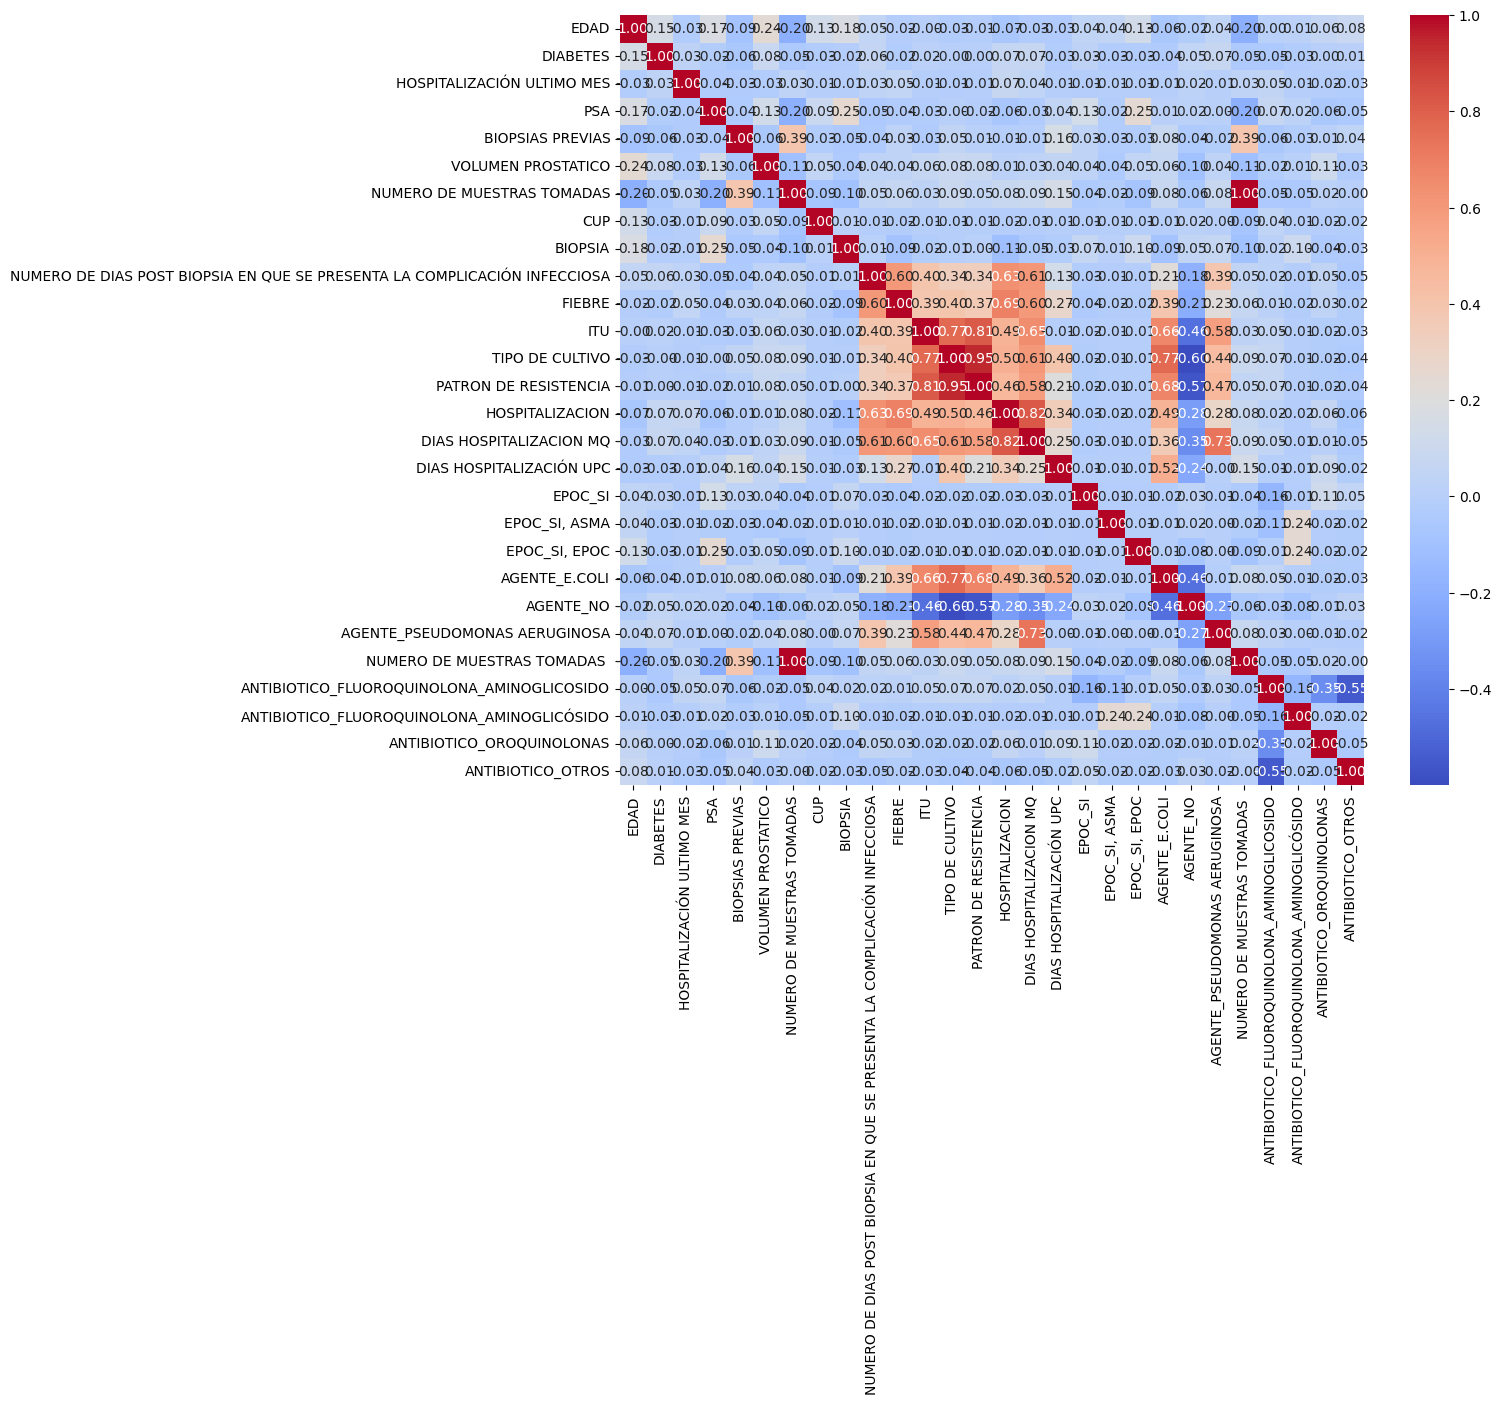

In [49]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Es crucial revisar las variables redundantes a través de la matriz de correlación para asegurar que nuestro modelo de Random Forest funcione de manera óptima. Al eliminar variables altamente correlacionadas, evitamos la multicolinealidad, que puede afectar la interpretación del modelo y su capacidad predictiva.

A pesar de que la matriz de correlación puede resultar un poco confusa debido a la cantidad de columnas, es un paso fundamental para identificar las variables que más influyen en nuestra variable objetivo y descartar aquellas que no aportan información relevante.

Para simplificar el análisis, podemos generar una sentencia que nos muestre las variables más correlacionadas con nuestra variable objetivo. Esto nos ayudará a centrar nuestra atención en las características más importantes para nuestro modelo.

Incluso debido a la cantidad de columnas puede presentar errores.

In [51]:
correlation_with_target = df.corr()['HOSPITALIZACION'].sort_values(ascending=False)
print(correlation_with_target)


HOSPITALIZACION                                                              1.000000
DIAS HOSPITALIZACION MQ                                                      0.823136
FIEBRE                                                                       0.689369
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0.632574
TIPO DE CULTIVO                                                              0.504299
AGENTE_E.COLI                                                                0.491957
ITU                                                                          0.491957
PATRON DE RESISTENCIA                                                        0.463978
DIAS HOSPITALIZACIÓN UPC                                                     0.341620
AGENTE_PSEUDOMONAS AERUGINOSA                                                0.283029
NUMERO DE MUESTRAS TOMADAS                                                   0.080781
NUMERO DE MUESTRAS TOMADAS                            

En este caso, podemos observar que las variables con mayor correlación positiva con "HOSPITALIZACION" son "DIAS HOSPITALIZACION MQ", "FIEBRE" y "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA". Esto sugiere que estas variables podrían ser importantes para predecir la hospitalización de pacientes después de una biopsia de próstata. Por otro lado, las variables con correlación negativa más cercana a cero, como "BIOPSIA" y "EDAD", parecen tener una correlación menos significativa con la hospitalización y hay mas varibles que tiene una correlacion menos significativa por eso voy a empezar a eliminarlas.

Yo pense que si llevaba las columnas que converti a dummy me ayudarian a tener un mejor modelo , debido al analisis que hice con las graficas, pero aca observo que no tuvieron gran impacto.

La matriz de correlación es una tabla que muestra cómo se relacionan las variables entre sí en un conjunto de datos. Se utiliza para identificar patrones y relaciones entre las variables. Ayuda a entender cómo cambian juntas o en direcciones opuestas. Es útil para seleccionar características en modelos predictivos y diagnosticar problemas en los datos
La matriz de correlación  es útil para identificar variables redundantes, es decir, aquellas que están altamente correlacionadas entre sí. Esto es importante en el análisis de datos porque la redundancia puede afectar negativamente la precisión de los modelos predictivos y dificultar la interpretación de los resultados.

In [52]:
important_correlations = correlation_with_target[abs(correlation_with_target) > 0.5]
print(important_correlations)


HOSPITALIZACION                                                              1.000000
DIAS HOSPITALIZACION MQ                                                      0.823136
FIEBRE                                                                       0.689369
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    0.632574
TIPO DE CULTIVO                                                              0.504299
Name: HOSPITALIZACION, dtype: float64


Basado en esto voy a empezar eliminar las columnas, esto lo pude hacer hecho antes pero decidi primero , considerar todo , analisar para ya luego llegar a este punto y eliminar.
Para seleccionar las variables más relevantes para el modelo, voy a considerar aquellas que tienen una correlación absoluta significativa con la variable objetivo (en este caso, 'HOSPITALIZACION'). Basándonos en la correlación absoluta y en la interpretación del impacto de cada variable, podríamos eliminar aquellas que tengan una correlación baja y parezcan tener menos influencia en la hospitalización después de la biopsia de próstata.

Las variables que podrían considerarse para eliminar son aquellas con una correlación absoluta cercana a cero o muy baja (por ejemplo, menor que 0.1). Estas variables podrían no contribuir significativamente a la predicción de la hospitalización y, por lo tanto, podrían eliminarse para simplificar el modelo y reducir la complejidad.

In [53]:
variables_a_eliminar = [
    'NUMERO DE MUESTRAS TOMADAS',
    'HOSPITALIZACIÓN ULTIMO MES',
    'DIABETES',
    'ANTIBIOTICO_OROQUINOLONAS',
    'ANTIBIOTICO_FLUOROQUINOLONA_AMINOGLICOSIDO',
    'VOLUMEN PROSTATICO',
    'BIOPSIAS PREVIAS',
    'EPOC_SI, EPOC',
    'CUP',
    'ANTIBIOTICO_FLUOROQUINOLONA_AMINOGLICÓSIDO',
    'EPOC_SI, ASMA',
    'EPOC_SI',
    'ANTIBIOTICO_OTROS',
    'PSA'
]
df = df.drop(columns=variables_a_eliminar)
df.head()


,EDAD,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC,AGENTE_E.COLI,AGENTE_NO,AGENTE_PSEUDOMONAS AERUGINOSA,NUMERO DE MUESTRAS TOMADAS
0,53,0,1,1,0,0,0,1,2,0,0,1,0,12
1,56,0,1,1,0,0,0,1,5,0,0,1,0,12
2,57,0,1,1,0,1,1,1,4,3,1,0,0,24
3,56,0,1,1,0,0,0,1,5,0,0,1,0,12
4,55,0,1,1,0,1,0,1,4,3,1,0,0,24


Para explicar el modelo de Random Forest y sus hiperparámetros, primero se debe entender qué es un Random Forest. Random Forest es un algoritmo de aprendizaje supervisado utilizado para tareas de clasificación y regresión. Se basa en la construcción de múltiples árboles de decisión durante el entrenamiento y la fusión de sus predicciones para obtener un resultado final más robusto y preciso.

Los hiperparámetros principales de un Random Forest son:

n_estimators: Número de árboles en el bosque. Más árboles generalmente conducen a un mejor rendimiento, pero también aumentan el tiempo de entrenamiento.
max_depth: Profundidad máxima de cada árbol. Controla la profundidad máxima de cada árbol en el bosque. Una profundidad más profunda puede llevar a un sobreajuste.
min_samples_split: Número mínimo de muestras requeridas para dividir un nodo interno. Este hiperparámetro controla cuán grande debe ser un nodo antes de que se pueda dividir.
min_samples_leaf: Número mínimo de muestras requeridas para estar en un nodo hoja. Este hiperparámetro controla el número mínimo de muestras en un nodo hoja.
La grilla de hiperparámetros se definió de la siguiente manera:

n_estimators: Se varió entre 50, 100 y 200 para determinar cuántos árboles se necesitan en el bosque. Más árboles pueden mejorar la precisión del modelo.
max_depth: Se consideró None, 5, 10 y 20 para evaluar la profundidad máxima de cada árbol. Una profundidad más profunda puede llevar a un sobreajuste, mientras que una profundidad menor puede no capturar la complejidad de los datos.
min_samples_split: Se probó con 2, 5 y 10 para estudiar el número mínimo de muestras requeridas para dividir un nodo interno. Un valor más alto puede ayudar a prevenir el sobreajuste al requerir una mayor cantidad de muestras para dividir un nodo.
min_samples_leaf: Se consideraron 1, 2 y 4 para el número mínimo de muestras requeridas para estar en un nodo hoja. Un valor más alto puede ayudar a prevenir el sobreajuste al requerir una mayor cantidad de muestras en cada hoja.
Estos hiperparámetros se seleccionaron para explorar diferentes configuraciones que puedan afectar significativamente el rendimiento del modelo. La combinación óptima de estos hiperparámetros puede mejorar la capacidad predictiva del modelo de Random Forest.

In [58]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



X = df.drop('HOSPITALIZACION', axis=1)
y = df['HOSPITALIZACION']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


print("Mejores hiperparámetros:", best_params)


best_accuracy = grid_search.best_score_
print("Mejor precisión:", best_accuracy)


best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)


y_pred = best_rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mejor precisión: 1.0
Accuracy: 1.0
Confusion Matrix:
 [[109   0]
 [  0   5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00         5

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



Este es un excelente resultado el modelo  modelo de Random Forest ha logrado una precisión perfecta en el conjunto de prueba, lo que significa que clasificó correctamente todos los casos. La matriz de confusión y el informe de clasificación también muestran una puntuación perfecta en precisión, recall y f1-score para ambas clases. Esto indica que el modelo es muy efectivo para predecir la hospitalización basándose en las características proporcionadas.

Es importante tener en cuenta que obtener una precisión del 100% puede indicar un posible sobreajuste en el modelo, especialmente si el conjunto de datos es relativamente pequeño. Sería útil realizar una validación cruzada más exhaustiva o considerar ajustar los hiperparámetros para asegurarse de que el modelo generalice bien a nuevos datos. 



Métricas de Evaluación:

Precisión: La precisión mide la proporción de predicciones positivas correctas (verdaderos positivos) sobre todas las predicciones positivas realizadas por el modelo.
Una alta precisión indica que el modelo tiene menos falsos positivos, es decir, que cuando predice que un paciente será hospitalizado, es probable que lo sea.

Recall (Sensibilidad): El recall mide la proporción de verdaderos positivos que fueron correctamente identificados por el modelo sobre el total de casos positivos reales.
Un alto recall indica que el modelo puede identificar la mayoría de los casos positivos reales, es decir, que cuando un paciente necesita hospitalización, el modelo es capaz de predecirlo correctamente.

F1-Score: El F1-score es la media armónica entre la precisión y el recall. Es útil cuando hay un desequilibrio entre las clases en el conjunto de datos. 
El F1-score proporciona un balance entre la precisión y el recall, lo que lo hace útil cuando se desea tener una métrica que tome en cuenta ambas dimensiones de la clasificación.

Los resultados de las métricas de evaluación muestran un rendimiento perfecto del modelo en la clasificación de la hospitalización de los pacientes. Esto indica que el modelo es altamente preciso y sensible en la predicción de la necesidad de hospitalización.

El desbalance de datos es un factor relevante a considerar en el desarrollo de modelos, ya que puede afectar significativamente el entrenamiento y la capacidad predictiva del modelo. En este caso específico, donde la mayoría de los pacientes no fueron hospitalizados, el desbalance puede influir en el aprendizaje del modelo de varias maneras:

Impacto en la precisión: El desbalance puede llevar a que el modelo tenga una alta precisión en la clase mayoritaria (pacientes no hospitalizados) pero una baja precisión en la clase minoritaria (pacientes hospitalizados). Esto se debe a que el modelo puede tender a predecir la clase mayoritaria con mayor frecuencia.

Sesgo en la predicción: El desbalance puede generar un sesgo en la predicción del modelo, favoreciendo la clase mayoritaria. Esto puede llevar a que el modelo tenga dificultades para identificar correctamente los casos de la clase minoritaria, lo que es crítico en este contexto, donde identificar los pacientes con mayor riesgo de hospitalización es fundamental.

Es importante utilizar métricas de evaluación adecuadas para evaluar el rendimiento del modelo en un contexto desbalanceado. Métricas como la precisión, el recall, la F1-score y la matriz de confusión son especialmente útiles para comprender cómo el modelo está realizando las predicciones en ambas clases.

En conclusión, el desbalance de datos en este trabajo puede influir en el entrenamiento y el rendimiento del modelo, especialmente en la capacidad para identificar correctamente los casos de hospitalización. Es fundamental abordar este desbalance mediante técnicas como el muestreo estratificado o el ajuste de pesos de clase para mejorar la capacidad predictiva del modelo y garantizar una evaluación más equilibrada y precisa.